# Data Story

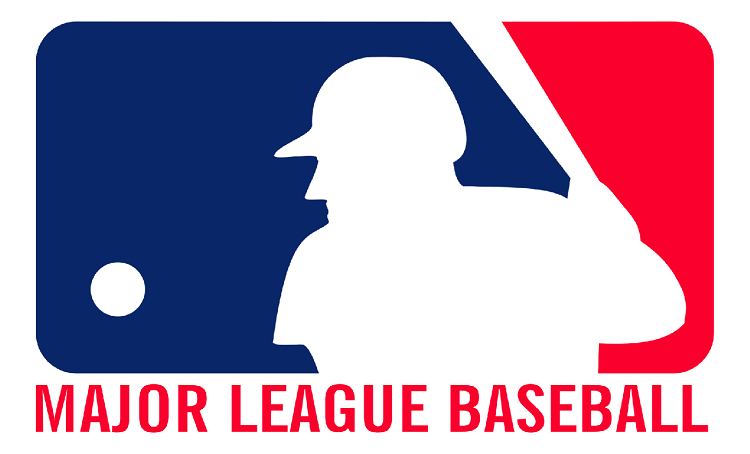

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

# Loading Related Libraries 

In [2655]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Dataset Display Settings 

In [2656]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x:'%.3f' % x)
pd.set_option('display.width',500)

# Let's Get To Know The Dataset

In [2657]:
df_=pd.read_csv('hitters.csv')

In [2658]:
df=df_.copy()

In [2659]:
df.sample(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
65,585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,A,E,0,0,0,950.000,A
184,586,159,12,72,79,53,9,3082,880,83,363,477,295,N,E,181,13,4,1043.333,N
139,438,103,2,65,32,71,2,440,103,2,67,32,71,A,W,276,7,9,100.000,N
37,268,60,5,24,25,15,2,350,78,5,34,29,18,N,W,442,59,6,90.000,N
64,24,3,0,1,0,2,3,159,28,0,20,12,9,A,W,80,4,0,NaN,A
58,313,78,6,32,41,12,12,3742,968,35,409,321,170,N,W,106,206,7,416.667,N
313,580,207,8,107,71,105,5,2778,978,32,474,322,417,A,E,121,267,19,1600.000,A
221,576,167,8,89,49,57,4,822,232,19,132,83,79,N,E,325,12,8,210.000,N
189,484,127,20,66,65,67,7,3006,844,116,436,458,377,N,E,1231,80,7,1183.333,N
213,303,71,3,18,30,36,3,344,76,3,20,36,45,N,E,468,47,6,100.000,N


# About The Dataset

In [2660]:
print("The dataset has {} rows and {} columns.".format(df.shape[0],df.shape[1]),end="\n\n")
print("Names of variables in the dataset:" )
for col in df.columns:
      print(col,end="  ")
print(end="\n\n")
print("Index information in the dataset:" )
print(df.index,end="\n\n")
print("Data type of variables in dataset :")
print(df.dtypes,end="\n\n")
print("Missing values of variables in the dataset: ")
print(df.isnull().sum(),end="\n\n")
print("The total number of missing values in the dataset: ")
print(df.isnull().sum().sum(),end="\n\n")
print("Memory usage of label values (index/columns) in the dataset: " )
print(df.memory_usage())

The dataset has 322 rows and 20 columns.

Names of variables in the dataset:
AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks  League  Division  PutOuts  Assists  Errors  Salary  NewLeague  

Index information in the dataset:
RangeIndex(start=0, stop=322, step=1)

Data type of variables in dataset :
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

Missing values of variables in the dataset: 
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI

# Let's Get to Know the Variables 

- AtBat : Number of times at bat in 1986
- Hits  : Number of hits in 1986
- HmRun : Number of home runs in 1986
- Runs  : Number of runs in 1986
- RBI   : Number of runs batted in in 1986
- Walks : Number of walks in 1986
- Years : Number of years in the major leagues
- CAtBat: Number of times at bat during his career
- CHits : Number of hits during his career
- CHmRun: Number of home runs during his career
- CRuns : Number of runs during his career
- CRBI  : Number of runs batted in during his career
- CWalks :Number of walks during his career
- League :A factor with levels A and N indicating player’s league at the end of 1986
- Division :A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts: Number of put outs in 1986
- Assists : Number of assists in 1986
- Errors :Number of errors in 1986
- Salary: 1987 annual salary on opening day in thousands of dollars
- NewLeague : A factor with levels A and N indicating player’s league at the beginning of 1987

## Variables Classification

In [2661]:
base_df_columns=df.columns.values
base_df_columns

array(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype=object)

In [2662]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    # Categorical Variables
    
    cat_cols=[i for i in dataframe.columns if dataframe[i].dtypes=='O']
    num_but_cat=[i for i in dataframe.columns if dataframe[i].dtypes!='O' and dataframe[i].nunique()<cat_th]
    cat_but_car=[i for i in dataframe.columns if dataframe[i].dtypes=='O' and dataframe[i].nunique()>car_th]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[i for i in cat_cols if i not in cat_but_car]
    
    # Continuous Variables
    
    num_cols=[i for i in dataframe.columns if dataframe[i].dtypes!='O']
    num_cols=[i for i in num_cols if i not in num_but_cat]
    
    print('Number of Observations : {}'.format(dataframe.shape[0]))
    print('Number of Variables    : {}'.format(dataframe.shape[1]))
    print('Number of Categorical Variables : {}'.format(len(cat_cols)))
    print('Number of Numerical Variables : {}'.format(len(num_cols)))
    print('Number of Numerical but Categorical Variables : {}'.format(len(num_but_cat)))
    print('Number of Categorical but Cardinal Variables : {}'.format(len(cat_but_car)))
    
    return cat_cols,num_cols,cat_but_car 

In [2663]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)
print(end='\n\n')
print('Categorical Variables :',cat_cols,end='\n\n')
print('Continuous Variables  :',num_cols,end='\n\n')
print('Categorical but Cardinal  Variables :',cat_but_car,end='\n\n')

Number of Observations : 322
Number of Variables    : 20
Number of Categorical Variables : 3
Number of Numerical Variables : 17
Number of Numerical but Categorical Variables : 0
Number of Categorical but Cardinal Variables : 0


Categorical Variables : ['League', 'Division', 'NewLeague']

Continuous Variables  : ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']

Categorical but Cardinal  Variables : []



### Let's Examine Categorical Variables 

In [2664]:
for i in cat_cols:
    print('Unique class number of ',i,':'+str(df[i].nunique()))

Unique class number of  League :2
Unique class number of  Division :2
Unique class number of  NewLeague :2


Categorical Veriables :  League

A    175
N    147
Name: League, dtype: int64



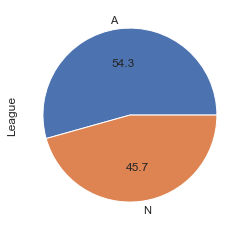

Categorical Veriables :  Division

W    165
E    157
Name: Division, dtype: int64



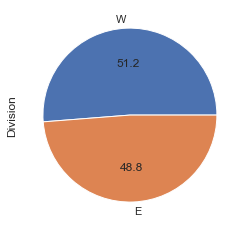

Categorical Veriables :  NewLeague

A    176
N    146
Name: NewLeague, dtype: int64



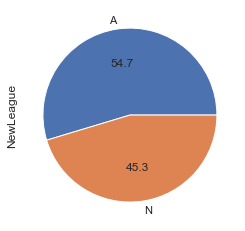

In [2665]:
for i in cat_cols:
    print('Categorical Veriables : ', i,end='\n\n')
    print(df[i].value_counts(),end='\n\n')
    df[i].value_counts().plot(kind='pie',y='points',autopct='%.1f')
    plt.show()

#### League 

In the 1986-1987 season, there were a total of 26 teams in the baseball major league.
- 7 teams in the West region 7 teams in the East region in the American League
-6 teams in the West region of the National League 6 teams in the East region 

<a href="https://en.wikipedia.org/wiki/1986_Major_League_Baseball_season">Referances</a>

In [2666]:
print(df['League'].value_counts().index[0]+' total number of players in the league: '+str(df['League'].value_counts()[0]))
print(df['League'].value_counts().index[1]+' total number of players in the league: '+str(df['League'].value_counts()[1]))

A total number of players in the league: 175
N total number of players in the league: 147


There are 9 members of a team on the stage in the baseball arena.Therefore

   - At least 9 * 14 players in the American League
   - At least 9 * 12 players in the National league

there should be

Extra players in the league can be interpreted as substitutes belonging to the teams. 

In [2667]:
print(df['League'].value_counts().index[0]+' total number of main players in the league   : ' +str(9*14))
print(df['League'].value_counts().index[0]+' total number of substitutes in the league    : '+ \
      str(df['League'].value_counts()[0]-9*14),end='\n\n')
print(df['League'].value_counts().index[1]+' total number of main players in the league   : ' +str(9*12))
print(df['League'].value_counts().index[1]+' total number of substitutes in the league    : '+ \
      str(df['League'].value_counts()[1]-9*12),end='\n\n')

A total number of main players in the league   : 126
A total number of substitutes in the league    : 49

N total number of main players in the league   : 108
N total number of substitutes in the league    : 39



#### League - New League 

- In the 1986-1987 season 
    - In American League 175 
    - In National League 147 <br>
    
there are players. 

- At the beginning of the 1987 season 
    - In American League 176
    - In National League 146 <br>
    
there are players. 

In [2668]:
len(df.loc[(df['League']=='A') & (df['NewLeague']=='A')])

166

In [2669]:
len(df.loc[(df['League']=='N') & (df['NewLeague']=='N')])

137

In [2670]:
A_to_N_index=df.loc[(df['League']=='A') & (df['NewLeague']=='N')].index
print(A_to_N_index,end='\n\n')
print('Number of players transferred from league A to league N  :'\
      ,len(df.loc[(df['League']=='A') & (df['NewLeague']=='N')]))

Int64Index([21, 75, 138, 139, 162, 170, 178, 195, 207], dtype='int64')

Number of players transferred from league A to league N  : 9


In [2671]:
N_to_A_index=df.loc[(df['League']=='N') & (df['NewLeague']=='A')].index
print(N_to_A_index,end='\n\n')
print('Number of players transferred from league N to league A  :'\
      ,len(df.loc[(df['League']=='N') & (df['NewLeague']=='A')]))

Int64Index([6, 76, 111, 123, 164, 211, 243, 252, 291, 295], dtype='int64')

Number of players transferred from league N to league A  : 10


- The number of players in a team transferred from the American League to the National League is 9 
- The number of players belonging to a team transferred from the National League to the American League is 9+1 

since there are 9 players in a team   9+1 --> supported my hypothesis about the existence of substitute players. .

In [2672]:
166+137+9+10 == df.shape[0] # Validation

True

In [2673]:
df.loc[A_to_N_index].agg(['min','max','mean']).compare(df.loc[N_to_A_index].agg(['min','max','mean']))

AtBat            Hits          HmRun          Runs           RBI         Walks         Years          CAtBat             CHits           CHmRun           CRuns            CRBI           CWalks         League       PutOuts         Assists         Errors          Salary          NewLeague      
        self   other    self   other   self  other   self  other   self  other   self  other   self  other     self    other     self    other    self   other    self   other    self    other    self   other   self other    self   other    self   other   self  other     self    other      self other
min  165.000  19.000  39.000   4.000    NaN    NaN 13.000  2.000  9.000  3.000 13.000  1.000    NaN    NaN  196.000   19.000   44.000    4.000   2.000   1.000  18.000   2.000  10.000    3.000  18.000   1.000      A     N   0.000  41.000   0.000   5.000  0.000  3.000   75.000   70.000         N     A
max  490.000 486.000 150.000 145.000 22.000 16.000 69.000 62.000 78.000 76.000 71.000 47.000 14.000 16.000 6126.000 7058.000 1839.000 1845.000 212.000 312.000 983.000 965.000 707.000 1128.000 644.000 990.000      A     N 686.000 726.000 286.000 204.000  9.000 16.000 1000.000 1050.000         N     A
mean 385.889 277.200 101.333  71.200  9.222  7.800 50.000 35.500 43.111 32.900 40.667 31.700  7.778  7.400 2834.333 2360.000  780.222  608.900  63.778  63.000 369.222 305.000 329.000  291.900 250.333 254.800    NaN   NaN 286.667 247.200  63.667  82.200  4.333  7.600  558.125  486.000       NaN   NaN

When reviewing the descriptive statistics of the players being transferred
   - Descriptive statistics of players transferred to league N  <br>
     It is seen that the players transferred to league A are higher than their descriptive statistics. 

In [2674]:
df.loc[df['League']=='A'].agg(['min','max','mean']).compare(df.loc[df['League']=='N'].agg(['min','max','mean']))

AtBat            Hits          HmRun           Runs             RBI           Walks         Years          CAtBat              CHits           CHmRun            CRuns              CRBI            CWalks          League        PutOuts          Assists         Errors          Salary         
        self   other    self   other   self  other    self   other    self   other    self  other   self  other     self     other     self    other    self   other     self    other     self    other     self    other   self other     self    other    self   other   self  other     self    other
min   16.000  19.000   2.000   1.000    NaN    NaN   1.000   0.000     NaN     NaN     NaN    NaN    NaN    NaN   28.000    19.000      NaN      NaN     NaN     NaN    1.000    2.000    0.000    3.000    0.000    1.000      A     N    0.000   41.000     NaN     NaN    NaN    NaN   67.500   70.000
max  687.000 642.000 238.000 211.000 40.000 31.000 130.000 107.000 121.000 116.000 105.000 94.000 20.000 24.000 9528.000 14053.000 2510.000 4256.000 548.000 384.000 1509.000 2165.000 1659.000 1652.000 1380.000 1566.000      A     N 1377.000 1378.000 482.000 492.000 26.000 32.000 2460.000 2127.333
mean 395.200 363.939 105.320  95.912 12.183  9.088  54.491  46.646  51.514  43.878  39.640 37.673  7.657  7.190 2709.806  2575.918  733.017  699.184  77.257  60.245  375.509  338.898  346.183  310.993  272.674  245.435    NaN   NaN  282.777  296.272 101.211 113.701  7.583  8.585  542.000  529.117

As a result
   - The a league is more quality than the B league, which can be commented. 

#### Division 

In [2675]:
df.loc[df['Division']=='E'].agg(['min','max','mean']).compare(df.loc[df['Division']=='W'].agg(['min','max','mean']))

AtBat            Hits          HmRun           Runs             RBI           Walks         Years          CAtBat              CHits           CHmRun            CRuns              CRBI            CWalks          Division        PutOuts          Assists         Errors          Salary         
        self   other    self   other   self  other    self   other    self   other    self  other   self  other     self     other     self    other    self   other     self    other     self    other     self    other     self other     self    other    self   other   self  other     self    other
min   16.000  19.000   1.000   3.000    NaN    NaN   0.000   1.000     NaN     NaN   0.000  1.000    NaN    NaN   28.000    19.000      NaN      NaN     NaN     NaN    1.000    2.000    0.000    3.000    0.000    1.000        E     W      NaN      NaN     NaN     NaN    NaN    NaN   67.500   68.000
max  687.000 680.000 238.000 223.000 40.000 35.000 130.000 119.000 121.000 117.000 105.000 92.000 18.000 24.000 8424.000 14053.000 2464.000 4256.000 351.000 548.000 1175.000 2165.000 1289.000 1659.000 1380.000 1566.000        E     W 1377.000 1378.000 492.000 487.000 32.000 29.000 2460.000 1900.000
mean 388.064 374.139 104.408  97.806 10.924 10.624  52.943  48.976  50.051  46.103  40.051 37.497  7.338  7.545 2594.051  2700.667  708.471  726.230  68.892  70.061  359.115  358.491  325.611  334.406  261.656  258.891      NaN   NaN  290.561  287.394 108.854 105.067  8.191  7.897  624.271  450.877

It is seen that the descriptive stats of the players in the East position are generally higher than the descriptive stats of the players in the West position. 

Exceptions: 

- It is seen that the players in the East position play less time in the major league than the players in the West position play in the major league .<br>

Therefore
    
   - Number of hits by players over their careers  - CAtBat
   - Number of accurate shots made by players throughout their careers  -CHits
   - Most valuable hits made by players throughout their careers  -CHmRun
   - The number of players players have run throughout their careers  -CRBI
   
It is seen that the players in the East position are lower than the players in the West position. 


### Let's Review Continuous/Numerical Variables

In [2676]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.000,380.929,153.405,16.000,255.250,379.500,512.000,687.000
Hits,322.000,101.025,46.455,1.000,64.000,96.000,137.000,238.000
HmRun,322.000,10.770,8.709,0.000,4.000,8.000,16.000,40.000
Runs,322.000,50.910,26.024,0.000,30.250,48.000,69.000,130.000
RBI,322.000,48.028,26.167,0.000,28.000,44.000,64.750,121.000
Walks,322.000,38.742,21.639,0.000,22.000,35.000,53.000,105.000
Years,322.000,7.444,4.926,1.000,4.000,6.000,11.000,24.000
CAtBat,322.000,2648.683,2324.206,19.000,816.750,1928.000,3924.250,14053.000
CHits,322.000,717.571,654.473,4.000,209.000,508.000,1059.250,4256.000
CHmRun,322.000,69.491,86.266,0.000,14.000,37.500,90.000,548.000


Continuous variables 
   - I think there is no problem with the minimum values<br>
     The available values for each variable are possible. 

Continuous variables
   - The standard deviation is quite high. <br>
     Therefore
        - At maximum values, descriptive statistics are quite high compared to the mean.
        - The median should be used when examining continuous variables. 

In [2677]:
for i in df[num_cols]:
    print(i,'\n',df[i].quantile([0.90,0.95,0.99,1]))

AtBat 
 0.900   584.900
0.950   609.900
0.990   658.590
1.000   687.000
Name: AtBat, dtype: float64
Hits 
 0.900   163.000
0.950   174.000
0.990   210.790
1.000   238.000
Name: Hits, dtype: float64
HmRun 
 0.900   24.000
0.950   28.950
0.990   33.000
1.000   40.000
Name: HmRun, dtype: float64
Runs 
 0.900    89.000
0.950    94.000
0.990   107.790
1.000   130.000
Name: Runs, dtype: float64
RBI 
 0.900    86.000
0.950    96.000
0.990   112.370
1.000   121.000
Name: RBI, dtype: float64
Walks 
 0.900    69.900
0.950    78.000
0.990    93.580
1.000   105.000
Name: Walks, dtype: float64
Years 
 0.900   15.000
0.950   17.000
0.990   19.790
1.000   24.000
Name: Years, dtype: float64
CAtBat 
 0.900    6123.400
0.950    7125.600
0.990    8749.970
1.000   14053.000
Name: CAtBat, dtype: float64
CHits 
 0.900   1659.600
0.950   2017.150
0.990   2500.340
1.000   4256.000
Name: CHits, dtype: float64
CHmRun 
 0.900   194.900
0.950   265.650
0.990   373.120
1.000   548.000
Name: CHmRun, dtype: float64


### Let's Examine the Target/Dependent/Output Variable 

In [2678]:
print('Minimum value of Target Variable                  :',df['Salary'].min())
print('Maximum value of Target Variable                  :',df['Salary'].max())
print('Missing number of observations of Target Variable :',df['Salary'].isnull().sum())
print('Number of observations not missing of Target      :',df['Salary'].notnull().sum())

Minimum value of Target Variable                  : 67.5
Maximum value of Target Variable                  : 2460.0
Missing number of observations of Target Variable : 59
Number of observations not missing of Target      : 263


#### Target Variable by Category Variables

League
A   542.000
N   529.118
Name: Salary, dtype: float64



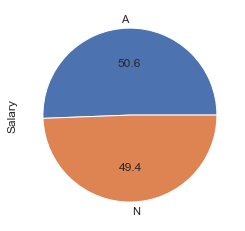

Division
E   624.271
W   450.877
Name: Salary, dtype: float64



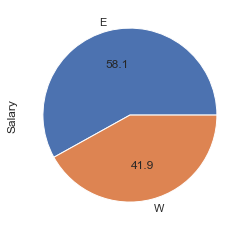

NewLeague
A   537.113
N   534.554
Name: Salary, dtype: float64



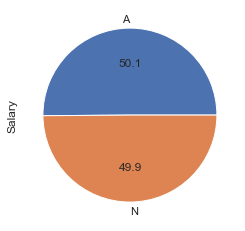

In [2679]:
for i in cat_cols:
    print(df.groupby(i)['Salary'].mean(),end='\n\n')
    df.groupby(i)['Salary'].mean().plot(kind='pie',y='points',autopct='%.1f')
    plt.show()

- The average earnings in league A are higher than the average earnings in league N. 
- Players playing in the East position have a higher average earnings than the players playing in the West position. 

#### Target Variable by Continuous Variables

- The relationship to be established between two continuous variables is a linear relationship. 
   - Is the variable increasing continuously while the target variable is increasing? correct proportion
   - Does the variable increase continuously while the target variable is decreasing? Inverse proportion 
- With correlation, the relationship between target variables and other continuous variables can be examined. 
   - (+) correlation Positive correlation: as the target variable increases, the numeric variable also increases.
   - (-) correlation Negative relationship: numeric variable increases while target variable decreases.

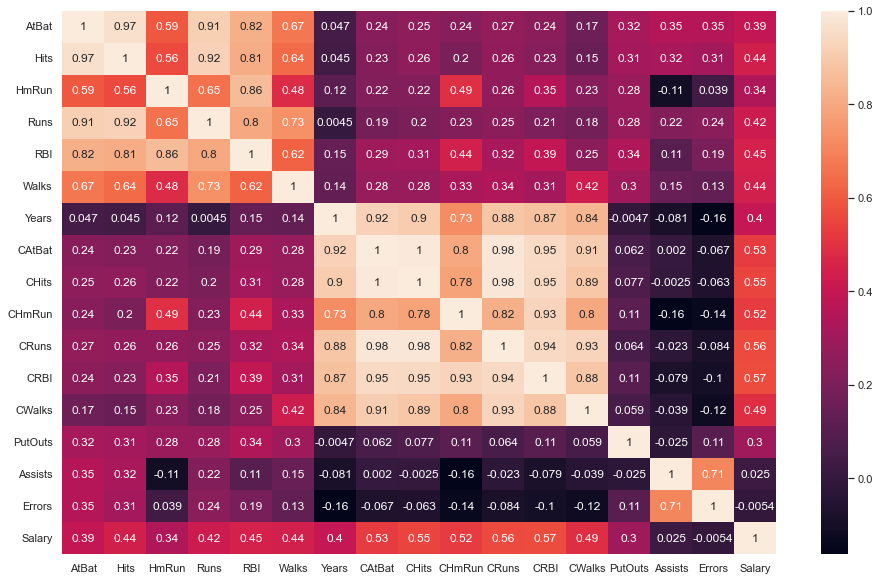

In [2680]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [2681]:
df.corr()['Salary'].nlargest(len(df.corr().columns))[1:]

CRBI       0.567
CRuns      0.563
CHits      0.549
CAtBat     0.526
CHmRun     0.525
CWalks     0.490
RBI        0.449
Walks      0.444
Hits       0.439
Runs       0.420
Years      0.401
AtBat      0.395
HmRun      0.343
PutOuts    0.300
Assists    0.025
Errors    -0.005
Name: Salary, dtype: float64

with Target Variable 
   - There is a positive correlation between continuous variables.--> Correct proportion 
        - As the units of observation of the variables increase, the values of the units of observation of the target variable also increase. 

Exceptional 
   - There is a negative correlation between the Errors variable.-->Inverse proportion 
        - If the number of mistakes the player makes decreases, the player's earnings increase. 


# Missing Observation Units Analysis

In [2682]:
print('Total number of missing observation units in the dataset : ', df.isnull().sum().sum(),end='\n\n')

Total number of missing observation units in the dataset :  59



In [2683]:
NaN_cols={i:[df[i].isnull().sum(),np.round((df[i].isnull().sum()/df.shape[0])*100, 2)] \
              for i in df.columns if df[i].isnull().sum()!=0}
print(NaN_cols,end='\n\n')
missing_values_df=pd.DataFrame(data=NaN_cols.values(),columns=['NaN_Count','Ratio'],index=NaN_cols.keys())
missing_values_df

{'Salary': [59, 18.32]}



,NaN_Count,Ratio
Salary,59,18.320


## Accessing Missing Observation Units

In [2684]:
df.loc[df[list(NaN_cols.keys())].isnull().any(axis=1)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


## Solve The Missing Observation Unit Problem 

In [2685]:
df.dropna(subset=[list(NaN_cols.keys())[0]],inplace=True)

In [2686]:
df.isnull().sum().sum()

0

In [2687]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            311, 312, 313, 314, 315, 317, 318, 319, 320, 321], dtype='int64', length=263)

If the number of mistakes the player makes decreases, the player's earnings increase. 

In [2688]:
df=df.reset_index(drop=True)

In [2689]:
df.index

RangeIndex(start=0, stop=263, step=1)

# Infinity Values Control

If the denominator of a continuous variable is zero, the number / infinity will come from 0 when new variables are created, taking into account the interaction of the continuous variables with each other.

Therefore, if the minimum value of the unit of observation of a continuous variable is zero, it is a solution to add the unit of observation of the variable with a number that will affect the variable the least. 

In the dataset display settings I have allowed the decimal part of the continuous variable to be shown as not 3 digits.
Therefore, the minimum integer value that will least affect a variable is 0.001. 

In [2690]:
df['Salary'].min()

67.5

In [2691]:
for i in df.columns:
    for index in range(df.shape[0]):
        if df.loc[index,i]==0:
            df.loc[index,i]+=0.001

# Feature Engineering

### Main Player - Substitute

In [2692]:
df.groupby(['League','Division'])['AtBat'].mean()

League  Division
A       E          435.294
        W          414.972
N       E          386.213
        W          373.587
Name: AtBat, dtype: float64

Condition of being a substitute player 

- A player's below average number of hits to the ball during a season

is in the form. 

In [2693]:
df.groupby(['League','Division'])['PutOuts'].mean()

League  Division
A       E          287.206
        W          273.648
N       E          309.885
        W          295.159
Name: PutOuts, dtype: float64

In [2694]:
LeagueA_DivisionE_Substitute=(df.loc[(df['League']=='A') & (df['Division']=='E') \
                                & (df['AtBat']<df.groupby(['League','Division'])['AtBat'].mean()[0]) \
                                & (df['PutOuts']<df.groupby(['League','Division'])['PutOuts'].mean()[0])
                                & (df['Assists']<df.groupby(['League','Division'])['Assists'].mean()[0])
                                ])

LeagueA_DivisionW_Substitute=(df.loc[(df['League']=='A') & (df['Division']=='W') \
                               & (df['AtBat'] <df.groupby(['League','Division'])['AtBat'].mean()[1]) \
                               & (df['PutOuts']<df.groupby(['League','Division'])['PutOuts'].mean()[1])
                               & (df['Assists']<df.groupby(['League','Division'])['Assists'].mean()[1])
                               ])

print('Estimated total number of substitutes under certain conditions in league A  : ', \
      len(LeagueA_DivisionE_Substitute)+len(LeagueA_DivisionW_Substitute))
print(df['League'].value_counts().index[0]+' total number of substitutes in the league  : ' + \
      str(df['League'].value_counts()[0]-9*14),end='\n\n')


LeagueN_DivisionE_Substitute=(df.loc[(df['League']=='N') & (df['Division']=='E') \
                               & (df['AtBat']<df.groupby(['League','Division'])['AtBat'].mean()[2]) \
                               & (df['PutOuts']<df.groupby(['League','Division'])['PutOuts'].mean()[2])
                               & (df['Assists']<df.groupby(['League','Division'])['Assists'].mean()[2])
                               ])

LeagueN_DivisionW_Substitute=(df.loc[(df['League']=='N') & (df['Division']=='W') \
                               & (df['AtBat']<df.groupby(['League','Division'])['AtBat'].mean()[3]) \
                               & (df['PutOuts']<df.groupby(['League','Division'])['PutOuts'].mean()[3])
                               & (df['Assists']<df.groupby(['League','Division'])['Assists'].mean()[3])
                               ])

print('Estimated total number of substitutes under certain conditions in league N  : ', \
      len(LeagueN_DivisionE_Substitute)+len(LeagueN_DivisionW_Substitute))
print(df['League'].value_counts().index[1]+' total number of substitutes in the league : '+ \
      str(df['League'].value_counts()[1]-9*12),end='\n\n')

Estimated total number of substitutes under certain conditions in league A  :  32
A total number of substitutes in the league  : 13

Estimated total number of substitutes under certain conditions in league N  :  35
N total number of substitutes in the league : 16



In [2695]:
Substitute=LeagueA_DivisionE_Substitute+LeagueA_DivisionW_Substitute+ \
           LeagueN_DivisionE_Substitute+LeagueN_DivisionW_Substitute
Substitute_=[]
for i in Substitute.index:
    Substitute_.append(i)

del Substitute

In [2696]:
for i in Substitute_:
    df.loc[i,'Substitute']='substitute'
df['Substitute'].fillna('main_player',inplace=True)
df['Substitute'].unique()

array(['main_player', 'substitute'], dtype=object)

main_player    196
substitute      67
Name: Substitute, dtype: int64


<AxesSubplot:ylabel='Substitute'>

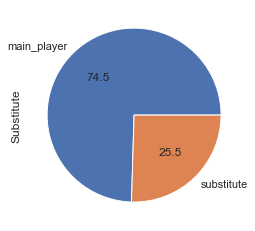

In [2697]:
print(df['Substitute'].value_counts())
df['Substitute'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Experience

In [2698]:
df['Experience']=pd.cut(df['Years'],bins=[0,df['Years'].quantile(0.25),df['Years'].quantile(0.66), 
                                                df['Years'].quantile(0.85),df['Years'].max()], \
                              labels=['beginner','normal','experienced','senior'])

In [2699]:
df['Experience'].unique() # Validation

['senior', 'beginner', 'experienced', 'normal']
Categories (4, object): ['beginner' < 'normal' < 'experienced' < 'senior']

beginner       90
normal         84
experienced    52
senior         37
Name: Experience, dtype: int64


<AxesSubplot:ylabel='Experience'>

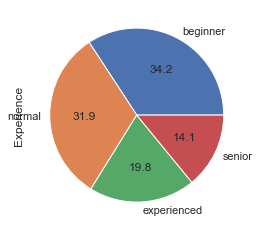

In [2700]:
print(df['Experience'].value_counts())
df['Experience'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Support

In [2701]:
df['Support_']=df['PutOuts']+df['Assists']

df['Support']=pd.qcut(df['Support_'],4,labels=['bronze','silver','gold','challenger'])

df.drop(columns=['Support_'],inplace=True)          

In [2702]:
df['Support'].unique() # Validation

['challenger', 'silver', 'bronze', 'gold']
Categories (4, object): ['bronze' < 'silver' < 'gold' < 'challenger']

bronze        67
silver        66
challenger    66
gold          64
Name: Support, dtype: int64


<AxesSubplot:ylabel='Support'>

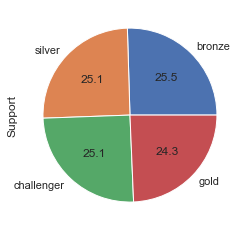

In [2703]:
print(df['Support'].value_counts())
df['Support'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Categorical_AtBat

In [2704]:
df['Categorical_AtBat']=pd.cut(df['AtBat'],bins=[0,df['AtBat'].quantile(0.25),df['AtBat'].quantile(0.50), 
                                                df['AtBat'].quantile(0.75),df['AtBat'].max()], \
                              labels=['low','not_low','medium','high'])

In [2705]:
df['Categorical_AtBat'].unique() # Validation

['not_low', 'medium', 'high', 'low']
Categories (4, object): ['low' < 'not_low' < 'medium' < 'high']

low        66
not_low    66
medium     66
high       65
Name: Categorical_AtBat, dtype: int64


<AxesSubplot:ylabel='Categorical_AtBat'>

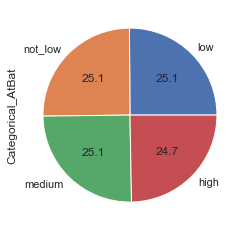

In [2706]:
print(df['Categorical_AtBat'].value_counts())
df['Categorical_AtBat'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Stability

In [2707]:
df['Errors_per_AtBat']=df['Errors']/df['AtBat']
df['Errors_per_AtBat']=pd.cut(df['Errors_per_AtBat'],bins=[-1,df['Errors_per_AtBat'].quantile(0.25),df['Errors_per_AtBat'].quantile(0.50), 
                                                df['Errors_per_AtBat'].quantile(0.75),df['Errors_per_AtBat'].max()], \
                              labels=['low','not_low','medium','high'])

In [2708]:
df.loc[(df['Categorical_AtBat']=='low') & (df['Errors_per_AtBat']=='low'),'Stability']='reliable_lowBat'
df.loc[(df['Categorical_AtBat']=='low') & (df['Errors_per_AtBat']=='not_low'),'Stability']='like_risky_lowBat'
df.loc[(df['Categorical_AtBat']=='low') & (df['Errors_per_AtBat']=='medium'),'Stability']='risky_lowBat'
df.loc[(df['Categorical_AtBat']=='low') & (df['Errors_per_AtBat']=='high'),'Stability']='unreliable_lowBat'

df.loc[(df['Categorical_AtBat']=='not_low') & (df['Errors_per_AtBat']=='low'),'Stability']='reliable_NlowBat'
df.loc[(df['Categorical_AtBat']=='not_low') & (df['Errors_per_AtBat']=='not_low'),'Stability']='like_risky_NlowBat'
df.loc[(df['Categorical_AtBat']=='not_low') & (df['Errors_per_AtBat']=='medium'),'Stability']='risky_NlowBat'
df.loc[(df['Categorical_AtBat']=='not_low') & (df['Errors_per_AtBat']=='high'),'Stability']='unreliable_NlowBat'

df.loc[(df['Categorical_AtBat']=='medium') & (df['Errors_per_AtBat']=='low'),'Stability']='reliable_mediumBat'
df.loc[(df['Categorical_AtBat']=='medium') & (df['Errors_per_AtBat']=='not_low'),'Stability']='like_risky_mediumBat'
df.loc[(df['Categorical_AtBat']=='medium') & (df['Errors_per_AtBat']=='medium'),'Stability']='risky_mediumBat'
df.loc[(df['Categorical_AtBat']=='medium') & (df['Errors_per_AtBat']=='high'),'Stability']='unreliable_mediumBat'

df.loc[(df['Categorical_AtBat']=='high') & (df['Errors_per_AtBat']=='low'),'Stability']='reliable_highBat'
df.loc[(df['Categorical_AtBat']=='high') & (df['Errors_per_AtBat']=='not_low'),'Stability']='like_risky_highBat'
df.loc[(df['Categorical_AtBat']=='high') & (df['Errors_per_AtBat']=='medium'),'Stability']='risky_highBat'
df.loc[(df['Categorical_AtBat']=='high') & (df['Errors_per_AtBat']=='high'),'Stability']='unreliable_highBat'


In [2709]:
df['Stability'].nunique()==16 # Validation

True

reliable_mediumBat      19
like_risky_NlowBat      19
risky_highBat           19
unreliable_mediumBat    19
unreliable_lowBat       18
unreliable_NlowBat      18
reliable_highBat        18
risky_lowBat            17
like_risky_highBat      17
like_risky_lowBat       16
risky_NlowBat           15
reliable_lowBat         15
risky_mediumBat         14
reliable_NlowBat        14
like_risky_mediumBat    14
unreliable_highBat      11
Name: Stability, dtype: int64


<AxesSubplot:>

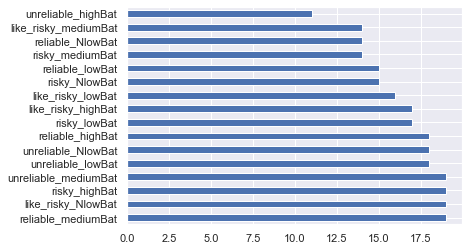

In [2710]:
print(df['Stability'].value_counts())
df['Stability'].value_counts().plot(kind='barh')

### Categorical_Runs

In [2711]:
df['Categorical_Runs']=pd.cut(df['Runs'],bins=[-1,df['Runs'].quantile(0.25),df['Runs'].quantile(0.50), 
                                                df['Runs'].quantile(0.75),df['Runs'].max()], \
                              labels=['bronze','silver','gold','challenger'])

In [2712]:
df['Categorical_Runs'].unique() # Validation

['bronze', 'gold', 'silver', 'challenger']
Categories (4, object): ['bronze' < 'silver' < 'gold' < 'challenger']

gold          67
bronze        66
silver        66
challenger    64
Name: Categorical_Runs, dtype: int64


<AxesSubplot:ylabel='Categorical_Runs'>

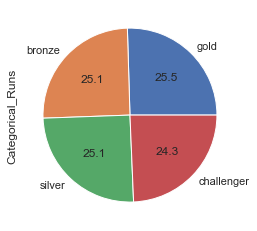

In [2713]:
print(df['Categorical_Runs'].value_counts())
df['Categorical_Runs'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Scorer

In [2714]:
df['Runs_per_AtBat']=df['Runs']/df['AtBat']

In [2715]:
df['Scorer']=pd.cut(df['Runs_per_AtBat'],bins=[-1,df['Runs_per_AtBat'].quantile(0.25),df['Runs_per_AtBat'].quantile(0.50), 
                                                df['Runs_per_AtBat'].quantile(0.75),df['Runs_per_AtBat'].max()], \
                     labels=['bronze','silver','gold','challenger'])

gold          67
bronze        66
silver        66
challenger    64
Name: Scorer, dtype: int64


<AxesSubplot:ylabel='Scorer'>

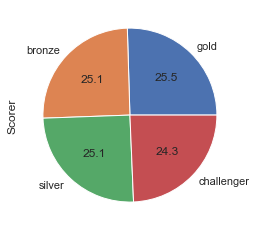

In [2716]:
print(df['Scorer'].value_counts())
df['Scorer'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Player_Type

G-->Good N-->Normal B-->Bad

In [2717]:
df.loc[((df['Scorer']=='bronze') |  (df['Scorer']=='silver')) & \
       ((df['Support']=='bronze') | (df['Support']=='silver')),'Player_Type']='Battacker_Bsupporter'

df.loc[((df['Scorer']=='bronze') | (df['Scorer']=='silver')) & \
       (df['Support']=='gold'),'Player_Type']='Battacker_Nsupporter'

df.loc[((df['Scorer']=='bronze') | (df['Scorer']=='silver')) & \
       (df['Support']=='challenger'),'Player_Type']='Battacker_Gsupporter'

df.loc[(df['Scorer']=='gold') & \
       ((df['Support']=='bronze') | (df['Support']=='silver')),'Player_Type']='Nattacker_Bsupporter'

df.loc[(df['Scorer']=='gold') & \
       (df['Support']=='gold'),'Player_Type']='Nattacker_Nsupporter'

df.loc[(df['Scorer']=='gold') & \
       (df['Support']=='challenger'),'Player_Type']='Nattacker_Gsupporter'


df.loc[(df['Scorer']=='challenger') & \
       ((df['Support']=='bronze') | (df['Support']=='silver')),'Player_Type']='Hattacker_Bsupporter'

df.loc[(df['Scorer']=='challenger') & \
       (df['Support']=='gold'),'Player_Type']='Hattacker_Nsupporter'

df.loc[(df['Scorer']=='challenger') & \
       (df['Support']=='challenger'),'Player_Type']='Hattacker_Gsupporter'


In [2718]:
df['Player_Type'].nunique()==9 # Validation

True

Battacker_Bsupporter    61
Nattacker_Bsupporter    40
Battacker_Gsupporter    37
Battacker_Nsupporter    34
Hattacker_Bsupporter    32
Hattacker_Nsupporter    19
Nattacker_Gsupporter    16
Hattacker_Gsupporter    13
Nattacker_Nsupporter    11
Name: Player_Type, dtype: int64


<AxesSubplot:>

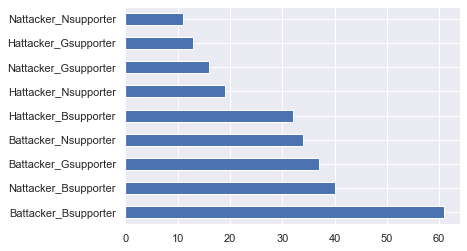

In [2719]:
print(df['Player_Type'].value_counts())
df['Player_Type'].value_counts().plot(kind='barh')

### 1986-1987vsAll

In [2720]:
df['Point_per_Season']=((df['CHits']+df['CHmRun']+df['CRuns']+df['CRBI']+df['CWalks'])/df['CAtBat']) /df['Years']

In [2721]:
df['Point_per_1986-1987']=((df['Hits']+df['HmRun']+df['Runs']+df['RBI']+df['Walks'])/df['AtBat'])

In [2722]:
for index1,i in enumerate(df['Point_per_Season']):
    for index2,j in enumerate(df['Point_per_1986-1987']):
        if j<i-(df['Point_per_Season'].std()) and index1==index2: 
            df.loc[index2,'1986-1987vsAll']='worse'
        if j>=i and j<i+df['Point_per_Season'].std() and index1==index2: 
            df.loc[index2,'1986-1987vsAll']='some'
        if j>=i+df['Point_per_Season'].std() and index1==index2:
             df.loc[index2,'1986-1987vsAll']='better'

In [2723]:
df.loc[df['Years']==1,'1986-1987vsAll']='Unknown'

better     245
Unknown     17
worse        1
Name: 1986-1987vsAll, dtype: int64


<AxesSubplot:>

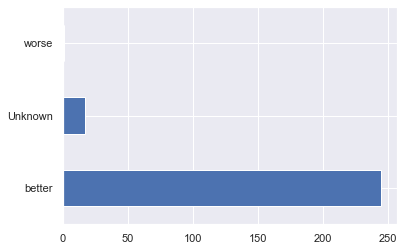

In [2724]:
print(df['1986-1987vsAll'].value_counts())
df['1986-1987vsAll'].value_counts().plot(kind='barh')

### Categorical_Hits

In [2725]:
df['Categorical_Hits']=pd.cut(df['Hits'],bins=[0,df['Hits'].quantile(0.25),df['Hits'].quantile(0.50), 
                                                df['Hits'].quantile(0.75),df['Hits'].max()], \
                              labels=['low','not_low','medium','high'])

In [2726]:
df['Categorical_Hits'].unique() # validation

['not_low', 'medium', 'high', 'low']
Categories (4, object): ['low' < 'not_low' < 'medium' < 'high']

low        66
not_low    66
high       66
medium     65
Name: Categorical_Hits, dtype: int64


<AxesSubplot:ylabel='Categorical_Hits'>

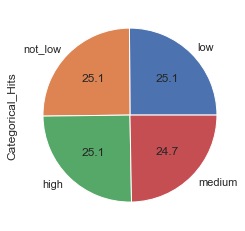

In [2727]:
print(df['Categorical_Hits'].value_counts())
df['Categorical_Hits'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Categorical_HmRun

In [2728]:
df['Categorical_HmRun']=pd.cut(df['HmRun'],bins=[-1,df['HmRun'].quantile(0.25),df['HmRun'].quantile(0.50), 
                                                df['HmRun'].quantile(0.75),df['HmRun'].max()], \
                              labels=['low','not_low','medium','high'])

In [2729]:
df['Categorical_HmRun'].unique() # Validation

['not_low', 'medium', 'high', 'low']
Categories (4, object): ['low' < 'not_low' < 'medium' < 'high']

low        81
medium     69
high       58
not_low    55
Name: Categorical_HmRun, dtype: int64


<AxesSubplot:ylabel='Categorical_HmRun'>

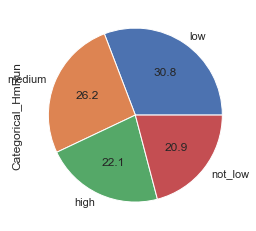

In [2730]:
print(df['Categorical_HmRun'].value_counts())
df['Categorical_HmRun'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Categorical RBI

In [2731]:
df['Categorical_RBI']=pd.cut(df['Runs'],bins=[-1,df['RBI'].quantile(0.25),df['RBI'].quantile(0.50), 
                                                df['RBI'].quantile(0.75),df['RBI'].max()], \
                              labels=['bronze','silver','gold','challenger'])

In [2732]:
df['Categorical_RBI'].unique()

['bronze', 'gold', 'silver', 'challenger', NaN]
Categories (4, object): ['bronze' < 'silver' < 'gold' < 'challenger']

gold          81
challenger    69
silver        61
bronze        51
Name: Categorical_RBI, dtype: int64


<AxesSubplot:ylabel='Categorical_RBI'>

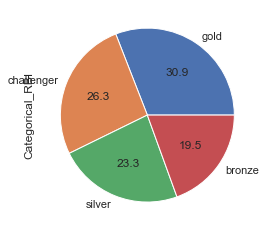

In [2733]:
print(df['Categorical_RBI'].value_counts())
df['Categorical_RBI'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Categorical Walks

In [2734]:
df['Categorical_Walks']=pd.cut(df['Walks'],bins=[-1,df['Walks'].quantile(0.25),df['Walks'].quantile(0.50), 
                                                df['Walks'].quantile(0.85),df['Walks'].max()], \
                              labels=['bronze','silver','gold','challenger'])

In [2735]:
df['Categorical_Walks'].unique()

['gold', 'challenger', 'silver', 'bronze']
Categories (4, object): ['bronze' < 'silver' < 'gold' < 'challenger']

gold          89
bronze        68
silver        67
challenger    39
Name: Categorical_Walks, dtype: int64


<AxesSubplot:ylabel='Categorical_Walks'>

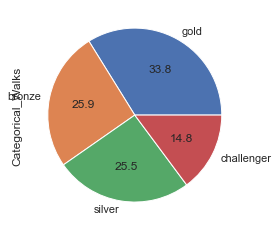

In [2736]:
print(df['Categorical_Walks'].value_counts())
df['Categorical_Walks'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

### Transfer

In [2737]:
df.loc[(df["League"] == "A") & (df["NewLeague"] == "A"), "Transfer"] = "A_unchanged"
df.loc[(df["League"] == "N") & (df["NewLeague"] == "N"), "Transfer"] = "N_unchanged"
df.loc[(df["League"] == "A") & (df["NewLeague"] == "N"), "Transfer"] = "promated_to_N"
df.loc[(df["League"] == "N") & (df["NewLeague"] == "A"), "Transfer"] = "relagated_to_A"

A_unchanged       131
N_unchanged       114
relagated_to_A     10
promated_to_N       8
Name: Transfer, dtype: int64


<AxesSubplot:ylabel='Transfer'>

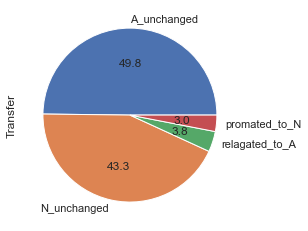

In [2738]:
print(df['Transfer'].value_counts())
df['Transfer'].value_counts().plot(kind='pie',y='points',autopct='%.1f')

## New Variables Created by Binary Combination According to the Interaction Between the Variables 

In [2740]:
df['Hits_per_AtBat']=df['Hits']/df['AtBat']

In [2741]:
df['HmRun_per_AtBat']=df['HmRun']/df['AtBat']

In [2742]:
df['RBI_per_AtBat']=df['RBI']/df['AtBat']

In [2743]:
df['Walks_per_AtBat']=df['Walks']/df['AtBat']

In [2744]:
df['AtBat_per_CAtBat']=df['AtBat']/df['CAtBat']

In [2745]:
df['Hits_per_CHits']=df['Hits']/df['CHits']

In [2746]:
df['HmRun_per_CHmRun']=df['HmRun']/df['CHmRun']

In [2747]:
df['Runs_per_CRuns']=df['Runs']/df['CRuns']

In [2748]:
df['RBI_per_CRBI']=df['RBI']/df['CRBI']

In [2749]:
df['Walks_per_CWalks']=df['Walks']/df['CWalks']

In [2750]:
df['PutOuts_per_AtBat']=df['PutOuts']/df['AtBat']

In [2751]:
df['Assits_per_AtBat']=df['Assists']/df['AtBat']

In [2752]:
df['Errors_per_AtBat']=df['Errors']/df['AtBat']

In [2753]:
df['HmRun_per_Hits']=df['HmRun']/df['Hits']

In [2754]:
df['Runs_per_Hits']=df['Runs']/df['Hits']

In [2755]:
df['RBI_per_Hits']=df['RBI']/df['Hits']

In [2756]:
df['Walks_per_Hits']=df['Walks']/df['Hits']

In [2757]:
df['PutOuts_per_Hits']=df['PutOuts']/df['Hits']

In [2758]:
df['Assists_per_Hits']=df['Assists']/df['Hits']

In [2759]:
df['Errors_per_Hits']=df['Errors']/df['Hits']

In [2760]:
df['Runs_per_HmRun']=df['Runs']/df['HmRun']

In [2761]:
df['RBI_per_HmRun']=df['RBI']/df['HmRun']

In [2762]:
df['Walks_per_HmRun']=df['Walks']/df['HmRun']

In [2763]:
df['Walks_per_HmRun']=df['Walks']/df['HmRun']

In [2764]:
df['PutOuts_per_HmRun']=df['PutOuts']/df['HmRun']

In [2765]:
df['Assists_per_HmRun']=df['Assists']/df['HmRun']

In [2766]:
df['Errors_per_HmRun']=df['Errors']/df['HmRun']

In [2767]:
df['RBI_per_Runs']=df['RBI']/df['Runs']

In [2768]:
df['Walks_per_Runs']=df['Walks']/df['Runs']

In [2769]:
df['PutOuts_per_Runs']=df['PutOuts']/df['Runs']

In [2770]:
df['Assists_per_Runs']=df['Assists']/df['Runs']

In [2771]:
df['Errors_per_Runs']=df['Errors']/df['Runs']

In [2772]:
df['Walks_per_RBI']=df['Walks']/df['RBI']

In [2773]:
df['PutOuts_per_RBI']=df['PutOuts']/df['RBI']

In [2774]:
df['Assists_per_RBI']=df['Assists']/df['RBI']

In [2775]:
df['Errors_per_RBI']=df['Errors']/df['RBI']

In [2776]:
df['PutOuts_per_Walks']=df['PutOuts']/df['Walks']

In [2777]:
df['Assits_per_Walks']=df['Assists']/df['Walks']

In [2778]:
df['Errors_per_Walks']=df['Errors']/df['Walks']

In [2779]:
df['Assits_per_PutOuts']=df['Assists']/df['PutOuts']

In [2780]:
df['Errors_per_PutOuts']=df['Errors']/df['PutOuts']

In [2781]:
df['Errors_per_Assists']=df['Errors']/df['Assists']

In [2782]:
df['CHits_per_CAtBat']=df['CHits']/df['CAtBat']

In [2783]:
df['CHmRun_per_CAtBat']=df['CHmRun']/df['CAtBat']

In [2784]:
df['CRuns_per_CAtBat']=df['CRuns']/df['CAtBat']

In [2785]:
df['CRBI_per_CAtBat']=df['CRBI']/df['CAtBat']

In [2786]:
df['CWalks_per_CAtBat']=df['CWalks']/df['CAtBat']

In [2787]:
df['CHmRun_per_CHits']=df['CHmRun']/df['CHits']

In [2788]:
df['CRuns_per_CHits']=df['CRuns']/df['CHits']

In [2789]:
df['CRBI_per_CHits']=df['CRBI']/df['CHits']

In [2790]:
df['CWalks_per_CHits']=df['CWalks']/df['CHits']

In [2791]:
df['CRuns_per_CHmRun']=df['CRuns']/df['CHmRun']

In [2792]:
df['CRBI_per_CHmRun']=df['CRBI']/df['CHmRun']

In [2793]:
df['CWalks_per_CHmRun']=df['CWalks']/df['CHmRun']

In [2794]:
df['CRBI_per_CRuns']=df['CRBI']/df['CRuns']

In [2795]:
df['CWalks_per_CRuns']=df['CWalks']/df['CRuns']

In [2796]:
df['CWalks_per_CRBI']=df['CWalks']/df['CRBI']

In [2797]:
df['CAtBat_per_Years'] = df['CAtBat'] / df['Years']

In [2798]:
df['CHmRun_per_Years'] = df['CHmRun'] / df['Years']

In [2799]:
df['CRuns_per_Years'] = df['CRuns'] / df['Years']

In [2800]:
df['CRBI_per_Years'] = df['CAtBat'] / df['Years']

In [2801]:
df['CWalks_per_Years'] = df['CWalks'] / df['Years']

# Reviewing Observation Units

In [2802]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 263
Number of Variables    : 98
Number of Categorical Variables : 17
Number of Numerical Variables : 81
Number of Numerical but Categorical Variables : 9
Number of Categorical but Cardinal Variables : 0


## Calculating Threshold Values for Outlier Observations as Lower Limit and Upper Limit 

In [2803]:
def outlier_thresholds(dataframe,col,q1=0.25,q3=0.75):
    quartile1=dataframe[col].quantile(q1)
    quartile3=dataframe[col].quantile(q3)
    inter_quartile_range=quartile3-quartile1
    down_limit=quartile1-(1.5*inter_quartile_range)
    up_limit=quartile3+(1.5*inter_quartile_range)
    
    return down_limit,up_limit

In [2804]:
for i in num_cols:
    print(i+":"+str(outlier_thresholds(df,i)))

AtBat:(-82.75, 891.25)
Hits:(-33.5, 246.5)
HmRun:(-14.5, 37.5)
Runs:(-25.75, 132.25)
RBI:(-31.5, 132.5)
Walks:(-28.0, 108.0)
Years:(-5.0, 19.0)
CAtBat:(-3729.5, 8462.5)
CHits:(-1051.0, 2317.0)
CHmRun:(-101.25, 208.75)
CRuns:(-482.5, 1085.5)
CRBI:(-399.25, 918.75)
CWalks:(-315.25, 714.75)
PutOuts:(-200.0, 636.0)
Assists:(-268.0, 468.0)
Errors:(-12.0, 28.0)
Salary:(-650.0, 1590.0)
Errors_per_AtBat:(-0.025150947287201308, 0.06657161679870682)
Runs_per_AtBat:(0.04948342880523732, 0.21646378887070378)
Point_per_Season:(-0.09706327879450495, 0.3236679112668697)
Point_per_1986-1987:(0.3671482476933278, 0.932329375309318)
Hits_per_AtBat:(0.19038483057126324, 0.3323897037974628)
HmRun_per_AtBat:(-0.024789717935715445, 0.07902982191232705)
RBI_per_AtBat:(0.008988226798482907, 0.24240962116146927)
Walks_per_AtBat:(-0.0035303502018938365, 0.20460852270186478)
AtBat_per_CAtBat:(-0.37486355395661053, 0.9089074375785227)
Hits_per_CHits:(-0.38784864897740184, 0.9392892759665277)
HmRun_per_CHmRun:(-0.4

## Detecting the Presence of Outlier Observation Units

In [2805]:
def check_outlier(dataframe,col):
    down_limit,up_limit=outlier_thresholds(dataframe,col)
    if dataframe[((dataframe[col]<down_limit) | (dataframe[col]>up_limit))].any(axis=None):
        return True
    else:
        return False

In [2806]:
for i in num_cols:
    print(i+":"+str(check_outlier(df,i)))

AtBat:False
Hits:False
HmRun:True
Runs:False
RBI:False
Walks:False
Years:True
CAtBat:True
CHits:True
CHmRun:True
CRuns:True
CRBI:True
CWalks:True
PutOuts:True
Assists:True
Errors:True
Salary:True
Errors_per_AtBat:True
Runs_per_AtBat:True
Point_per_Season:True
Point_per_1986-1987:True
Hits_per_AtBat:True
HmRun_per_AtBat:False
RBI_per_AtBat:True
Walks_per_AtBat:True
AtBat_per_CAtBat:True
Hits_per_CHits:True
HmRun_per_CHmRun:False
Runs_per_CRuns:False
RBI_per_CRBI:True
Walks_per_CWalks:True
PutOuts_per_AtBat:True
Assits_per_AtBat:True
HmRun_per_Hits:False
Runs_per_Hits:True
RBI_per_Hits:True
Walks_per_Hits:True
PutOuts_per_Hits:True
Assists_per_Hits:True
Errors_per_Hits:True
Runs_per_HmRun:True
RBI_per_HmRun:True
Walks_per_HmRun:True
PutOuts_per_HmRun:True
Assists_per_HmRun:True
Errors_per_HmRun:True
RBI_per_Runs:False
Walks_per_Runs:True
PutOuts_per_Runs:True
Assists_per_Runs:True
Errors_per_Runs:True
Walks_per_RBI:True
PutOuts_per_RBI:True
Assists_per_RBI:True
Errors_per_RBI:True
PutOut

## Accessing The Index Information Of Outlier Observation Units 

In [2807]:
def grab_outliers(dataframe,col,table=False,index=False):
    down,up=outlier_thresholds(dataframe,col)
    if table:
        if dataframe[((dataframe[col]<down) | (dataframe[col]>up))].any(axis=None):
            print(dataframe[((dataframe[col]<down) | (dataframe[col]>up))])
    if index:
        outliers_index=dataframe[((dataframe[col]<down) | (dataframe[col]>up))].index
        return outliers_index

In [2808]:
for i in num_cols:
    print(i+": "+str(grab_outliers(df,i,False,True)),end='\n\n\n')
    outliers_index=grab_outliers(df,i,False,True)
    print("Outliers :"+"\n"+str(df[i][outliers_index]),end='\n\n\n')                     

AtBat: Int64Index([], dtype='int64')


Outliers :
Series([], Name: AtBat, dtype: int64)


Hits: Int64Index([], dtype='int64')


Outliers :
Series([], Name: Hits, dtype: int64)


HmRun: Int64Index([105], dtype='int64')


Outliers :
105   40.000
Name: HmRun, dtype: float64


Runs: Int64Index([], dtype='int64')


Outliers :
Series([], Name: Runs, dtype: float64)


RBI: Int64Index([], dtype='int64')


Outliers :
Series([], Name: RBI, dtype: float64)


Walks: Int64Index([], dtype='int64')


Outliers :
Series([], Name: Walks, dtype: float64)


Years: Int64Index([91, 188, 200], dtype='int64')


Outliers :
91     20
188    24
200    20
Name: Years, dtype: int64


CAtBat: Int64Index([91, 188, 200, 225], dtype='int64')


Outliers :
91      8716
188    14053
200     9528
225     8759
Name: CAtBat, dtype: int64


CHits: Int64Index([20, 188, 200, 225, 248], dtype='int64')


Outliers :
20     2464
188    4256
200    2510
225    2583
248    2402
Name: CHits, dtype: int64


CHmRun: Int64Index([2, 8, 3

## Solving Outlier Observation Units Problems 

## Re-assignment with Tresholds 

In [2809]:
def replace_with_thresholds(dataframe,col):
    down_limit,up_limit=outlier_thresholds(dataframe,col)
    dataframe.loc[(dataframe[col]<down_limit),col]=down_limit
    dataframe.loc[(dataframe[col]>up_limit),col]=up_limit

In [2810]:
for i in num_cols:
    if i!='Salary':
        replace_with_thresholds(df,i)

In [2811]:
for i in num_cols:
    print(i+":"+str(check_outlier(df,i)))

AtBat:False
Hits:False
HmRun:False
Runs:False
RBI:False
Walks:False
Years:False
CAtBat:False
CHits:False
CHmRun:False
CRuns:False
CRBI:False
CWalks:False
PutOuts:False
Assists:False
Errors:False
Salary:True
Errors_per_AtBat:False
Runs_per_AtBat:False
Point_per_Season:False
Point_per_1986-1987:False
Hits_per_AtBat:False
HmRun_per_AtBat:False
RBI_per_AtBat:False
Walks_per_AtBat:False
AtBat_per_CAtBat:False
Hits_per_CHits:False
HmRun_per_CHmRun:False
Runs_per_CRuns:False
RBI_per_CRBI:False
Walks_per_CWalks:False
PutOuts_per_AtBat:False
Assits_per_AtBat:False
HmRun_per_Hits:False
Runs_per_Hits:False
RBI_per_Hits:False
Walks_per_Hits:False
PutOuts_per_Hits:False
Assists_per_Hits:False
Errors_per_Hits:False
Runs_per_HmRun:False
RBI_per_HmRun:False
Walks_per_HmRun:False
PutOuts_per_HmRun:False
Assists_per_HmRun:False
Errors_per_HmRun:False
RBI_per_Runs:False
Walks_per_Runs:False
PutOuts_per_Runs:False
Assists_per_Runs:False
Errors_per_Runs:False
Walks_per_RBI:False
PutOuts_per_RBI:False
Assis

# Encoding

In [2812]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 263
Number of Variables    : 98
Number of Categorical Variables : 17
Number of Numerical Variables : 81
Number of Numerical but Categorical Variables : 9
Number of Categorical but Cardinal Variables : 0


## Label Encoding

In [2813]:
binary_columns=[i for i in cat_cols if df[i].nunique()==2]
binary_columns

['League', 'Division', 'NewLeague', 'Substitute']

In [2814]:
from sklearn.preprocessing import LabelEncoder

In [2815]:
lbe=LabelEncoder()

In [2816]:
for i in binary_columns:
    df[i]=lbe.fit_transform(df[i])

## Rare Analysis

In [2817]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [2818]:
rare_analyser(df,'Salary',cat_cols)

League : 2
   COUNT  RATIO  TARGET_MEAN
0    139  0.529      542.000
1    124  0.471      529.118


Division : 2
   COUNT  RATIO  TARGET_MEAN
0    129  0.490      624.271
1    134  0.510      450.877


NewLeague : 2
   COUNT  RATIO  TARGET_MEAN
0    141  0.536      537.113
1    122  0.464      534.554


Substitute : 2
   COUNT  RATIO  TARGET_MEAN
0    196  0.745      605.878
1     67  0.255      331.289


Stability : 16
                      COUNT  RATIO  TARGET_MEAN
like_risky_NlowBat       19  0.072      386.254
like_risky_highBat       17  0.065     1009.608
like_risky_lowBat        16  0.061      257.469
like_risky_mediumBat     14  0.053      646.707
reliable_NlowBat         14  0.053      391.190
reliable_highBat         18  0.068      945.933
reliable_lowBat          15  0.057      286.178
reliable_mediumBat       19  0.072      672.675
risky_NlowBat            15  0.057      413.944
risky_highBat            19  0.072      557.561
risky_lowBat             17  0.065      351.686


## One-Hot Encoding

In [2819]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 263
Number of Variables    : 98
Number of Categorical Variables : 17
Number of Numerical Variables : 81
Number of Numerical but Categorical Variables : 13
Number of Categorical but Cardinal Variables : 0


In [2820]:
one_hot_cols=[i for i in cat_cols if 16>=df[i].nunique()>2]
one_hot_cols

['Stability',
 'Player_Type',
 '1986-1987vsAll',
 'Transfer',
 'Experience',
 'Support',
 'Categorical_AtBat',
 'Categorical_Runs',
 'Scorer',
 'Categorical_Hits',
 'Categorical_HmRun',
 'Categorical_RBI',
 'Categorical_Walks']

In [2821]:
def one_hot_encoder(dataframe,col):
    dataframe=pd.get_dummies(data=dataframe,columns=one_hot_cols,drop_first=True)
    return dataframe

In [2822]:
df=one_hot_encoder(df,one_hot_cols)

## Rare Analysis

In [2823]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Number of Observations : 263
Number of Variables    : 140
Number of Categorical Variables : 59
Number of Numerical Variables : 81
Number of Numerical but Categorical Variables : 59
Number of Categorical but Cardinal Variables : 0


In [2825]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [2826]:
rare_analyser(df,'Salary',cat_cols)

League : 2
   COUNT  RATIO  TARGET_MEAN
0    139  0.529      542.000
1    124  0.471      529.118


Division : 2
   COUNT  RATIO  TARGET_MEAN
0    129  0.490      624.271
1    134  0.510      450.877


NewLeague : 2
   COUNT  RATIO  TARGET_MEAN
0    141  0.536      537.113
1    122  0.464      534.554


Substitute : 2
   COUNT  RATIO  TARGET_MEAN
0    196  0.745      605.878
1     67  0.255      331.289


Stability_like_risky_highBat : 2
   COUNT  RATIO  TARGET_MEAN
0    246  0.935      503.192
1     17  0.065     1009.608


Stability_like_risky_lowBat : 2
   COUNT  RATIO  TARGET_MEAN
0    247  0.939      553.964
1     16  0.061      257.469


Stability_like_risky_mediumBat : 2
   COUNT  RATIO  TARGET_MEAN
0    249  0.947      529.697
1     14  0.053      646.707


Stability_reliable_NlowBat : 2
   COUNT  RATIO  TARGET_MEAN
0    249  0.947      544.064
1     14  0.053      391.190


Stability_reliable_highBat : 2
   COUNT  RATIO  TARGET_MEAN
0    245  0.932      505.803
1     18  0.068

In [2827]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

df.drop(useless_cols, axis=1, inplace=True)

# Scaling

In [2828]:
from sklearn.preprocessing import StandardScaler

In [2829]:
num_cols=[i for i in num_cols if i!='Salary']

In [2830]:
scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

# Correlation Analysis 

In [2831]:
corr=df.corr()['Salary'].nlargest(len(df.columns))[1:]
corr

CRBI                                0.599
CRuns                               0.598
CHits                               0.573
CWalks                              0.571
CHmRun                              0.570
CRuns_per_Years                     0.548
CAtBat                              0.545
CAtBat_per_Years                    0.505
CRBI_per_Years                      0.505
CHits_per_CAtBat                    0.477
CWalks_per_Years                    0.477
RBI                                 0.449
Walks                               0.444
CHmRun_per_Years                    0.443
Hits                                0.439
Runs                                0.420
Categorical_Walks_challenger        0.416
Categorical_Hits_high               0.415
Years                               0.406
AtBat                               0.395
CRBI_per_CAtBat                     0.362
CRuns_per_CAtBat                    0.353
HmRun                               0.342
Categorical_Runs_challenger       

In [2832]:
negative_corr=[]

for index,i in enumerate(corr):
    if i<0 and corr.index[index] not in base_df_columns:
        negative_corr.append(corr.index[index])
        

In [2833]:
negative_corr

['Walks_per_RBI',
 'Transfer_N_unchanged',
 'CWalks_per_CHits',
 'Player_Type_Nattacker_Nsupporter',
 'Assits_per_AtBat',
 'Transfer_relagated_to_A',
 'Support_gold',
 'Assits_per_PutOuts',
 'Errors_per_Assists',
 'CWalks_per_CRuns',
 'PutOuts_per_HmRun',
 'Assists_per_Hits',
 'Scorer_gold',
 'Scorer_silver',
 'Assists_per_Runs',
 'Stability_risky_NlowBat',
 'Player_Type_Nattacker_Bsupporter',
 'Assists_per_RBI',
 'Stability_reliable_NlowBat',
 'Stability_unreliable_NlowBat',
 'Assists_per_HmRun',
 'Assits_per_Walks',
 'Errors_per_PutOuts',
 'Categorical_Runs_silver',
 'Stability_unreliable_lowBat',
 'Categorical_HmRun_not_low',
 'Stability_risky_lowBat',
 'Errors_per_AtBat',
 'Walks_per_HmRun',
 'CRBI_per_CHmRun',
 'Stability_reliable_lowBat',
 'CWalks_per_CRBI',
 'CRuns_per_CHmRun',
 'Errors_per_HmRun',
 'Stability_like_risky_lowBat',
 'Player_Type_Battacker_Nsupporter',
 'RBI_per_HmRun',
 'Categorical_Walks_silver',
 'Errors_per_Runs',
 'Errors_per_Hits',
 'Runs_per_HmRun',
 'CWalks

In [2834]:
df.drop(columns=negative_corr,inplace=True)

# Modelling

## Creating target variables and features 

In [2835]:
y=df['Salary']
X=df.drop(columns=['Salary'],axis=1)

## Model Building / Training 

In [2836]:
# Model Class
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Model metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

In [2837]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          # ("CatBoost", CatBoostRegressor(verbose=False))
          ]


for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 294.5166 (LR) 
RMSE: 285.0084 (Ridge) 
RMSE: 280.0677 (Lasso) 
RMSE: 301.2932 (ElasticNet) 
RMSE: 323.3808 (KNN) 
RMSE: 355.7125 (CART) 
RMSE: 252.1685 (RF) 
RMSE: 446.1914 (SVR) 
RMSE: 255.649 (GBM) 
RMSE: 280.9982 (XGBoost) 
RMSE: 263.3335 (LightGBM) 


## Hyperparameter Optimization

In [2838]:
cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01, 0.01],
                  "max_depth": [5, 8, 12, 20],
                  "n_estimators": [100, 200, 300, 500],
                  "colsample_bytree": [0.5, 0.8, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

regressors = [("CART", DecisionTreeRegressor(), cart_params),
              ("RF", RandomForestRegressor(), rf_params),
              ('XGBoost', XGBRegressor(objective='reg:squarederror'), xgboost_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params)]

best_models = {}

In [2839]:
for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv=10, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
    best_models[name] = final_model

########## CART ##########
RMSE: 320.6534 (CART) 
RMSE (After): 302.1347 (CART) 
CART best params: {'max_depth': 4, 'min_samples_split': 29}

########## RF ##########
RMSE: 255.5012 (RF) 
RMSE (After): 253.8592 (RF) 
RF best params: {'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 200}

########## XGBoost ##########
RMSE: 280.9982 (XGBoost) 
RMSE (After): 257.462 (XGBoost) 
XGBoost best params: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

########## LightGBM ##########
RMSE: 263.3335 (LightGBM) 
RMSE (After): 256.7568 (LightGBM) 
LightGBM best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'n_estimators': 300}



### Stacking & Ensemble Learning;

In [2844]:
voting_reg = VotingRegressor(estimators=[('RF', best_models["RF"]),
                                         ('LightGBM', best_models["LightGBM"])])

voting_reg.fit(X, y)


np.mean(np.sqrt(-cross_val_score(voting_reg, X, y, cv=10, scoring="neg_mean_squared_error")))


245.58367367549255

# Feature Importances for Best Model GBM

In [2841]:
gbm_model = GradientBoostingRegressor(random_state=17)



gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

gbm_best_grid = GridSearchCV(gbm_model,
                             gbm_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=True).fit(X, y)

gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,
                                 random_state=17, ).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(gbm_model, X, y, cv=10, scoring="neg_mean_squared_error")))
print(round(rmse, 4))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
252.6951


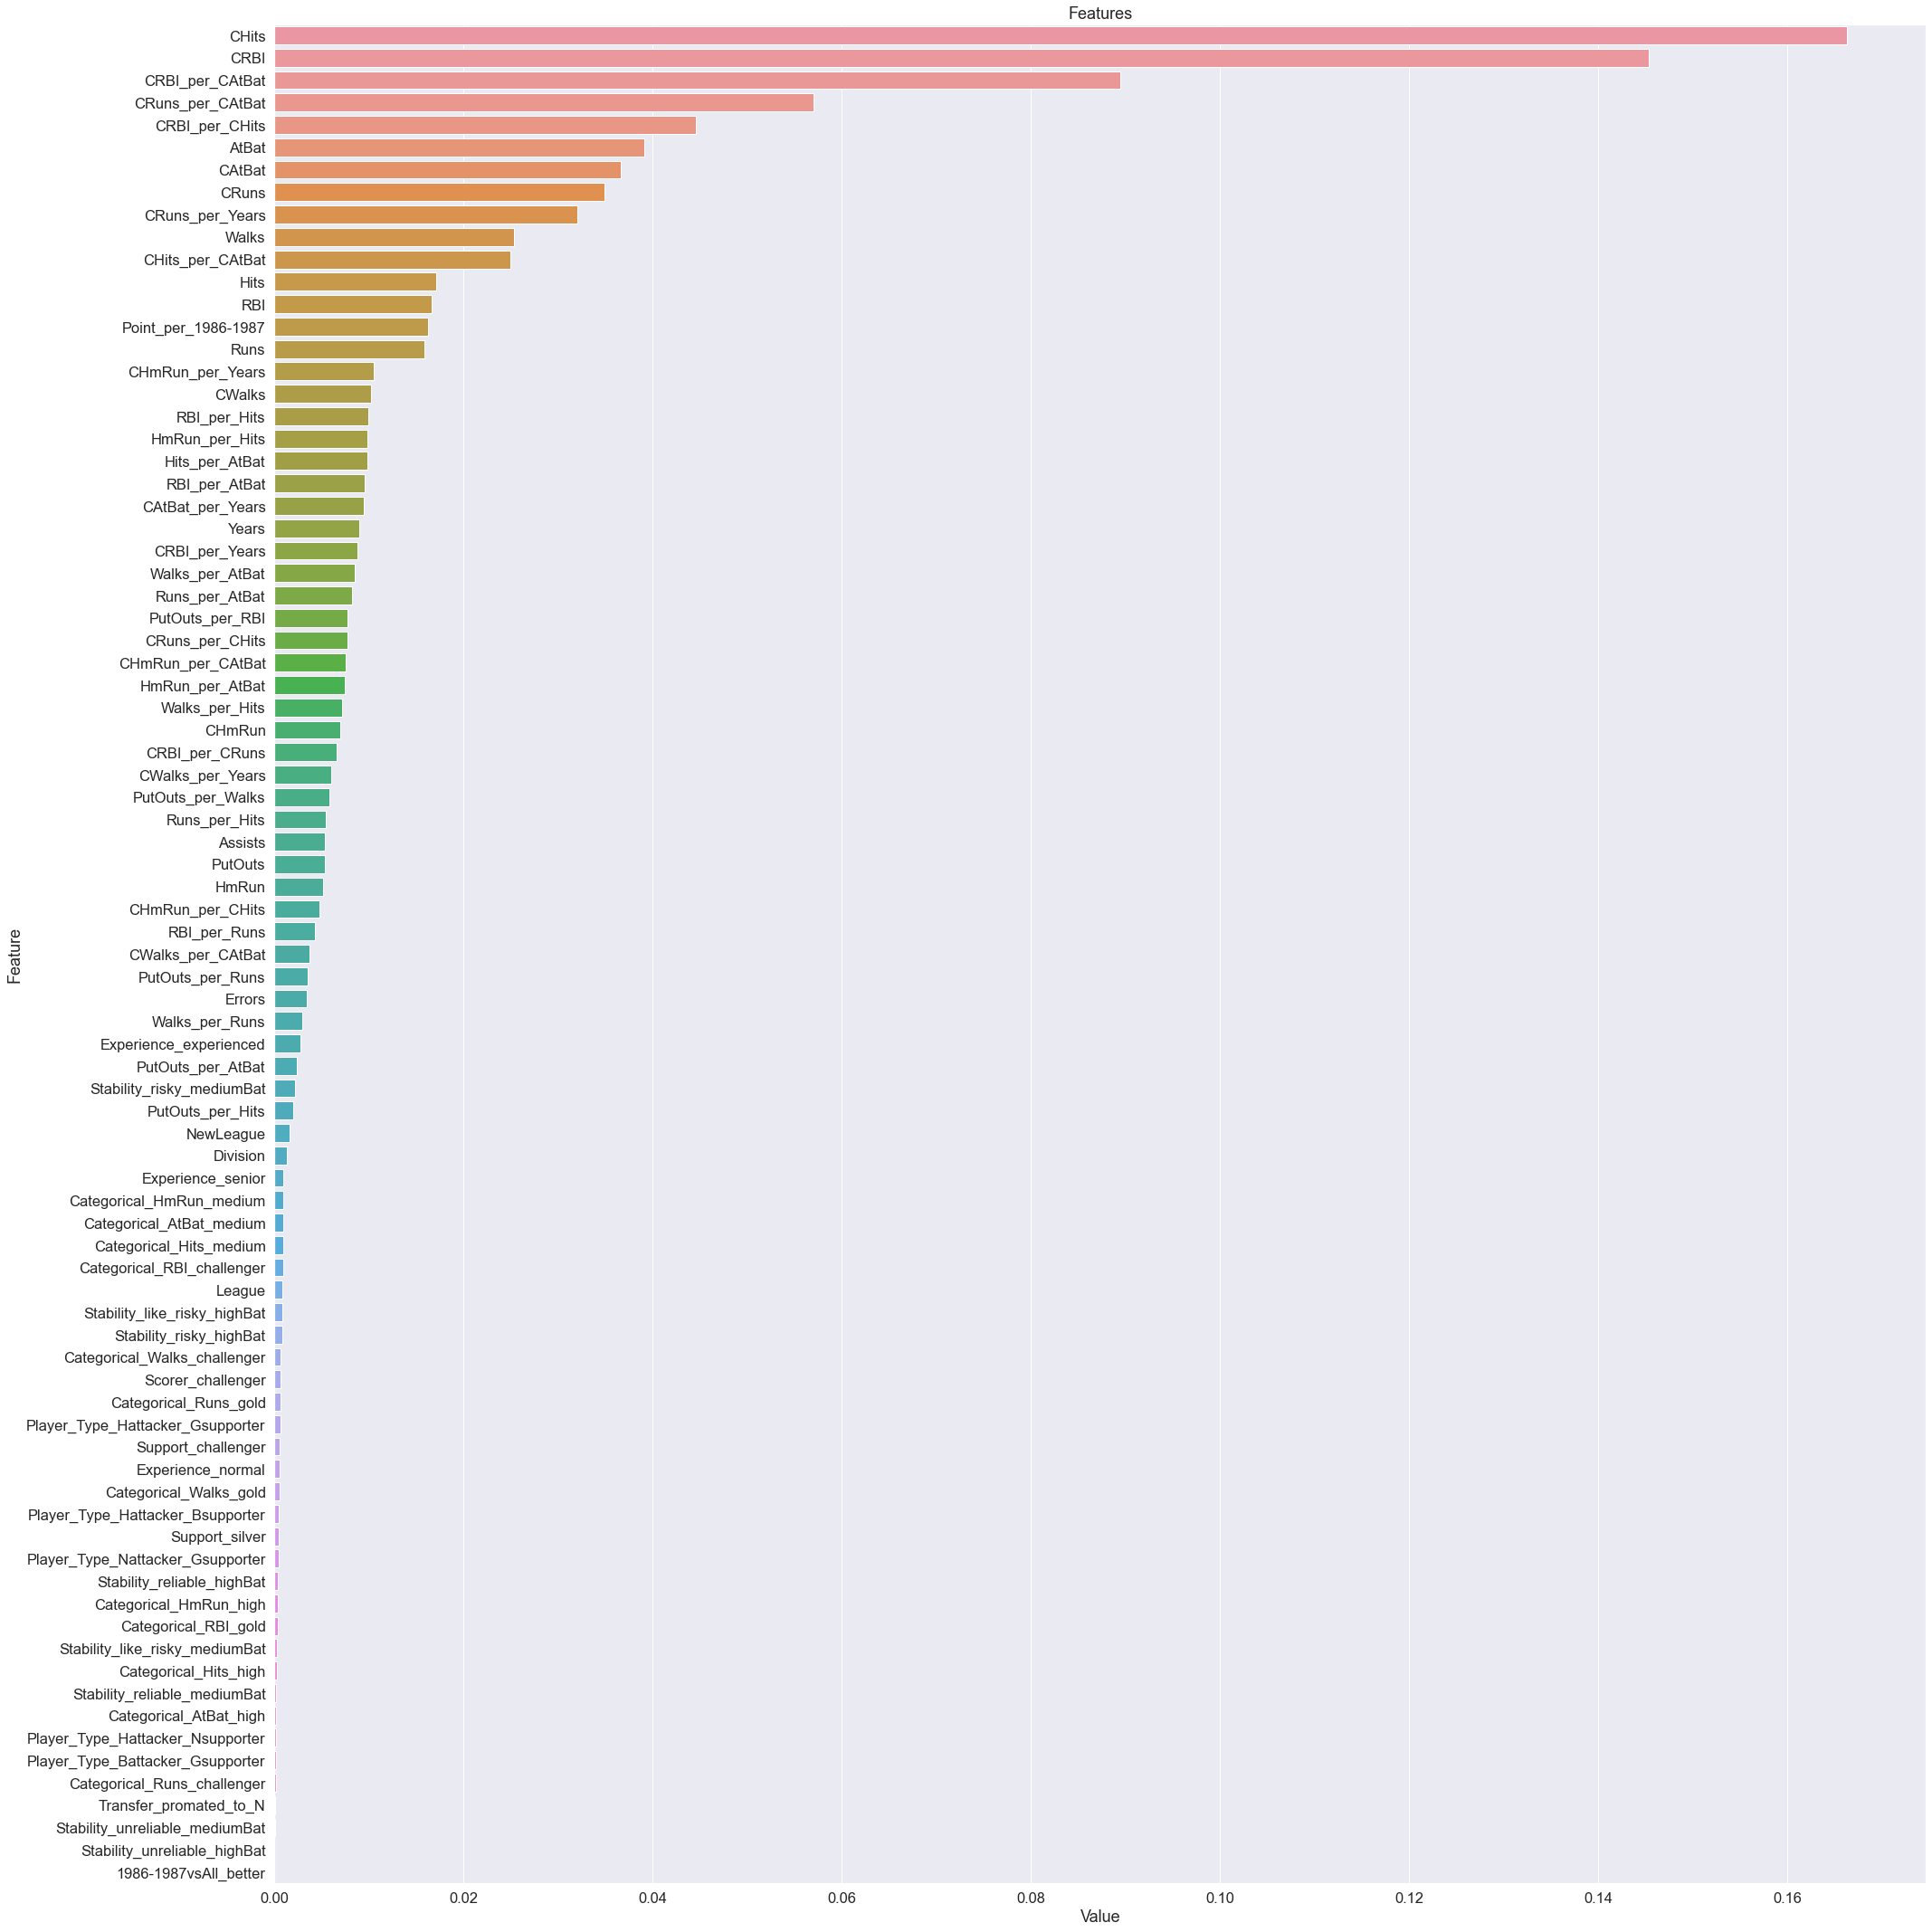

In [2852]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(gbm_final,X)

### **If you want to interact with me**

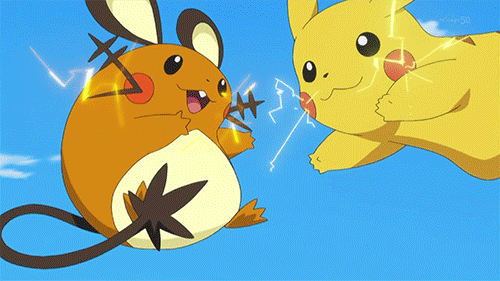

**My LinkedIn Address** :

<a href="https://www.linkedin.com/in/ibrahim-turkoglu/">LinkedIn</a>

**My Medium   Address** :

<a href="https://medium.com/@trkglu.ibrahim">Medium</a>

**My Github   Address** :

<a href="https://github.com/ibrahimturkoglu">Github</a>

**My Kaggle  Address** :

<a href="https://www.kaggle.com/brahimtrkolu">Kaggle</a>